In [523]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Sit and Stand

In [524]:
std = pd.read_csv('data/new/2.csv', index_col = None, header = None)

In [525]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [526]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,1.270584,1.655838,10.344177,0.000000,0.000000,0.000000
1,0.002411,ACC_UN,1.270584,1.655838,10.344177,0.000000,0.000000,0.000000
2,0.004822,ACC_UN,1.270584,1.655838,10.344177,0.000000,0.000000,0.000000
3,0.000000,GYRO_UN,-0.086746,-0.057419,0.021988,0.007874,-0.010559,-0.012024
4,0.002411,GYRO_UN,-0.086746,-0.057419,0.021988,0.007874,-0.010559,-0.012024
5,0.004822,GYRO_UN,-0.086746,-0.057419,0.021988,0.007874,-0.010559,-0.012024
6,0.007263,ACC_UN,1.270584,1.655838,10.344177,0.000000,0.000000,0.000000
7,0.007263,GYRO_UN,-0.086746,-0.057419,0.021988,0.007874,-0.010559,-0.012024
8,0.009735,ACC_UN,0.696304,1.751541,11.217560,0.000000,0.000000,0.000000
9,0.009735,GYRO_UN,0.079407,0.570541,-0.156387,0.007874,-0.010559,-0.012024


In [527]:
## Acceleration

In [528]:
std_acc = std[std[1]==' ACC_UN']

In [529]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [530]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

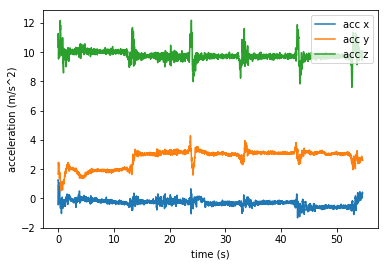

In [531]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


In [532]:
## Gyroscope

In [533]:
std_gyro = std[std[1]==' GYRO_UN']

In [534]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [535]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

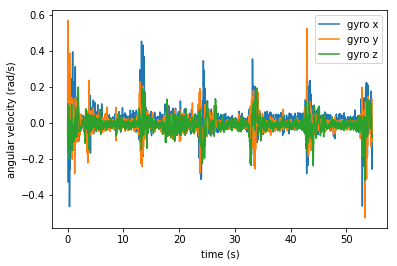

In [536]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [537]:
## Stability Detection

In [538]:
g = np.mean(acc_z)
g


9.805354257362076

In [539]:
sig_acc = g
sig_gyro = 0 + 0.5


In [540]:
w_min = 0.3
w_max = 1.1


In [541]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))


In [542]:
std_static  = np.zeros(len(acc_t))

In [543]:
i = 0

while(acc_t[i] + w_max < acc_t[-1]):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    #print('first', std_acc[i])
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1


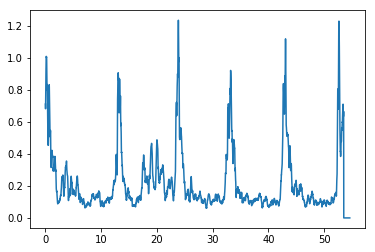

In [544]:
plt.plot(acc_t,std_acc)

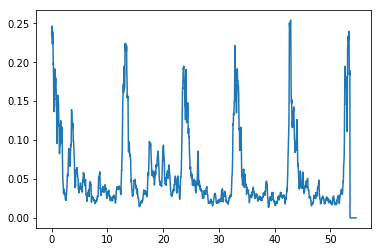

In [545]:
plt.plot(acc_t,std_gyro)

Text(0.5,1,u'Detection on Acceleration')

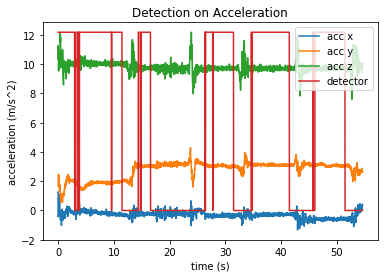

In [546]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

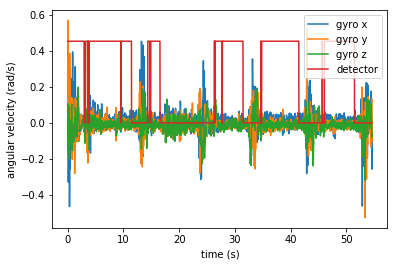

In [547]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

In [548]:
windows = []

In [549]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)

In [550]:
res = np.zeros((len(windows)/2,3))

In [551]:
for i in range(len(res)):
    print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])
    

('window1', [1283, 1443])
('window1', [1464, 1518])
('window1', [1548, 3882])
('window1', [3895, 4649])
('window1', [5835, 5981])
('window1', [6053, 6726])
('window1', [10688, 10707])
('window1', [10733, 11261])
('window1', [11270, 12778])
('window1', [14071, 14094])
('window1', [14135, 16846])
('window1', [18710, 20901])


In [552]:
res

array([[-1.98379040e-01,  1.86667099e+00,  1.00897412e+01],
       [ 5.98257550e-03,  1.67936283e+00,  1.00526030e+01],
       [-1.14283211e-01,  1.80350768e+00,  1.00696574e+01],
       [-2.53293207e-01,  1.94008418e+00,  1.00434990e+01],
       [-2.15223129e-01,  3.06381278e+00,  9.75057231e+00],
       [-2.33842303e-01,  3.03346264e+00,  9.74668143e+00],
       [-4.25795706e-01,  3.22124361e+00,  9.70982441e+00],
       [-3.66677891e-01,  3.06323427e+00,  9.72221094e+00],
       [-3.54734375e-01,  3.04283728e+00,  9.73335527e+00],
       [-2.47500876e-01,  3.11878437e+00,  9.69041045e+00],
       [-2.87640815e-01,  3.11359894e+00,  9.71232075e+00],
       [-5.79542556e-01,  3.08412787e+00,  9.71417435e+00]])

In [170]:
import scipy.io as sio
sio.savemat('res.mat', {'res':res})

# 2. Play and Put Down

In [603]:
std = pd.read_csv('data/new/1.csv', index_col = None, header = None)

In [604]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [605]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,0.904480,5.058426,8.822342,0.000000,0.000000,0.000000
1,0.002411,ACC_UN,0.904480,5.058426,8.822342,0.000000,0.000000,0.000000
2,0.005157,ACC_UN,0.904480,5.058426,8.822342,0.000000,0.000000,0.000000
3,0.007568,ACC_UN,0.904480,5.058426,8.822342,0.000000,0.000000,0.000000
4,0.005157,GYRO_UN,0.164917,-0.035431,0.048248,0.009628,-0.010483,-0.011078
5,0.007568,GYRO_UN,0.164917,-0.035431,0.048248,0.009628,-0.010483,-0.011078
6,0.009979,ACC_UN,0.904480,5.058426,8.822342,0.000000,0.000000,0.000000
7,0.009979,GYRO_UN,0.164917,-0.035431,0.048248,0.009628,-0.010483,-0.011078
8,-0.001434,MAG_UN,115.354919,-31.166077,-21.749878,101.246643,-10.182190,15.052795
9,0.012421,ACC_UN,0.904480,5.058426,8.822342,0.000000,0.000000,0.000000


In [606]:
## Acceleration

In [607]:
std_acc = std[std[1]==' ACC_UN']

In [608]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [609]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

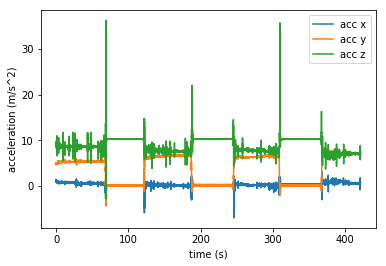

In [610]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


In [611]:
## Gyroscope

In [612]:
std_gyro = std[std[1]==' GYRO_UN']

In [613]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [614]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

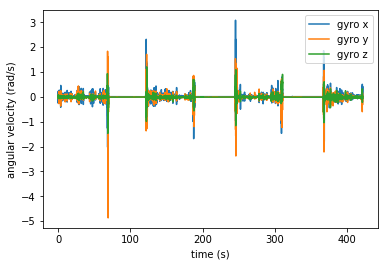

In [615]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [616]:
## Stability Detection

In [617]:
g = np.mean(acc_z)
g

8.791739912285154

In [618]:
sig_acc = g + 0.2
sig_gyro = 0 + 0.2

In [619]:
w_min = 0.3
w_max = 1.1

In [620]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [621]:
std_static  = np.zeros(len(acc_t))

In [622]:
acc_t[-1]

420.969458578

In [623]:
i= 0

while(acc_t[i] + w_max < acc_t[-1]):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if (std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro): #or (std_acc[i] < 0.2 and std_gyro[i] < 0.2):
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if (std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro): #or (std_acc_ < 0.2 and std_gyro_ < 0.2):
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1


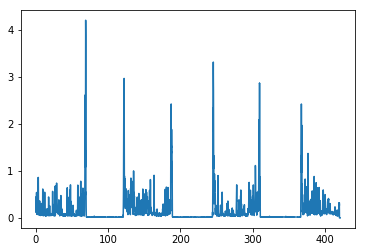

In [624]:
plt.plot(acc_t,std_acc)

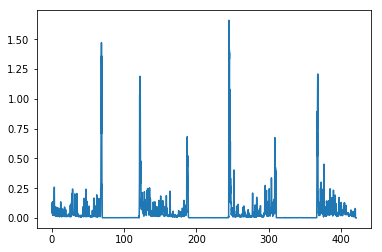

In [625]:
plt.plot(acc_t,std_gyro)

Text(0.5,1,u'Detection on Acceleration')

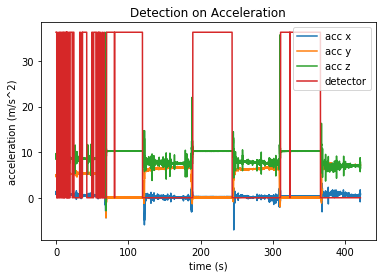

In [626]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

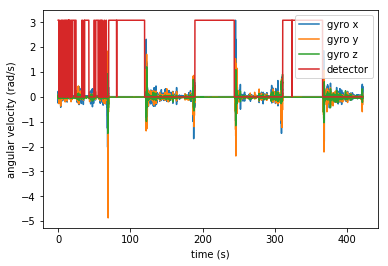

In [627]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

In [628]:
windows = []

In [629]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)

In [630]:
res = np.zeros((len(windows)/2,3))

In [631]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])

In [633]:
res[:10]

array([[0.91177233, 4.91087002, 8.81037428],
       [0.78700922, 5.19765234, 8.67057995],
       [0.80151002, 5.19624725, 8.64581466],
       [0.7302983 , 5.2130036 , 8.63562667],
       [0.73309206, 5.20904983, 8.63899918],
       [0.67056241, 5.26306816, 8.62919517],
       [0.74921342, 5.2237066 , 8.62695075],
       [0.73091137, 5.20447691, 8.64039512],
       [0.73989786, 5.18823853, 8.64755983],
       [0.73991436, 5.22138285, 8.62103031]])

In [ ]:
import scipy.io as sio
sio.savemat('res1.mat', {'res1':res})

# 3. Walking with Cellphone at Hand

In [371]:
std = pd.read_csv('data/new/3.csv', index_col = None, header = None)

In [372]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [373]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,-0.870987,1.521835,10.305893,0.000000,0.000000,0.000000
1,0.002411,ACC_UN,-0.870987,1.521835,10.305893,0.000000,0.000000,0.000000
2,0.004822,ACC_UN,-0.870987,1.521835,10.305893,0.000000,0.000000,0.000000
3,0.000000,GYRO_UN,0.027481,0.244339,-0.079422,0.007874,-0.010559,-0.012024
4,0.002411,GYRO_UN,0.027481,0.244339,-0.079422,0.007874,-0.010559,-0.012024
5,0.004822,GYRO_UN,0.027481,0.244339,-0.079422,0.007874,-0.010559,-0.012024
6,0.007263,ACC_UN,-0.870987,1.521835,10.305893,0.000000,0.000000,0.000000
7,0.007263,GYRO_UN,0.027481,0.244339,-0.079422,0.007874,-0.010559,-0.012024
8,0.009735,ACC_UN,-1.150955,1.531403,10.717453,0.000000,0.000000,0.000000
9,0.009735,GYRO_UN,-0.066589,0.181412,-0.022598,0.007874,-0.010559,-0.012024


In [374]:
time = std[0].values

In [375]:
## Acceleration

In [376]:
std_acc = std[std[1]==' ACC_UN']

In [377]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values


In [378]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

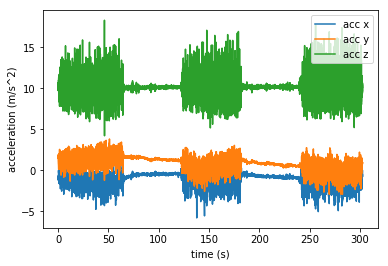

In [379]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


In [380]:
## Gyroscope

In [381]:
std_gyro = std[std[1]==' GYRO_UN']

In [382]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values


In [383]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

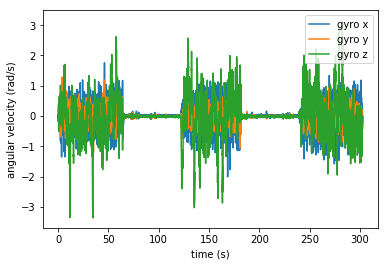

In [384]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


# Allan Variance - T_intial

In [385]:
res = []
iRange = range(10,160)

In [386]:
for i in iRange:
    sumR = 0
    
    for j in range(int(gyro_t[-1]/i)-1):
        sumR += (np.mean(gyro_x[(j+1)*i:(j+2)*i]) - np.mean(gyro_x[j*i:(j+1)*i]))**2
    #print('i', i)
        
    res.append(sumR/(2*int(gyro_t[-1]/i)))
        

Text(0,0.5,u'Allan Variance [$rad^2/s^2$]')

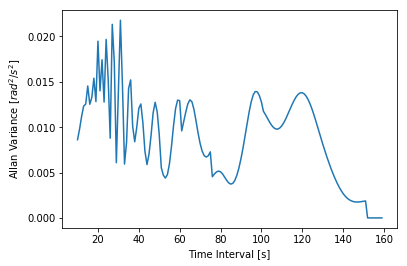

In [387]:
plt.plot(iRange, res)
plt.xlabel('Time Interval [s]')
plt.ylabel('Allan Variance [$rad^2/s^2$]')

In [388]:
## Start Index

In [389]:
indexR = res.index(list(filter(lambda x: x < 0.005, res))[3])
indexR

66

In [390]:
## Stability Detection

In [391]:
g = np.mean(acc_z)
g


10.126541564639748

In [392]:
sig_acc = g
sig_gyro = 0 + 0.3


In [393]:
w_min = 0.3
w_max = 1.1


In [405]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))


In [406]:
std_static  = np.zeros(len(acc_t))

In [463]:
i = 0

while(acc_t[i] + w_max < acc_t[-1]):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            if acc_t[i] > indexR:
                std_static[i] = 1
        
    
    ##############

    i = i + 1


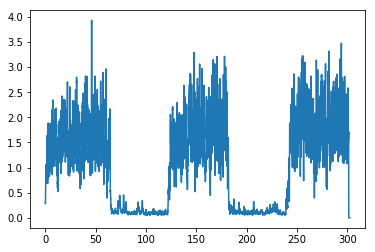

In [409]:
plt.plot(acc_t,std_acc)

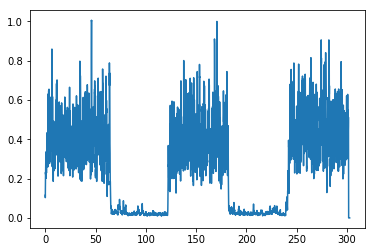

In [410]:
plt.plot(acc_t,std_gyro)

Text(0.5,1,u'Detection on Acceleration')

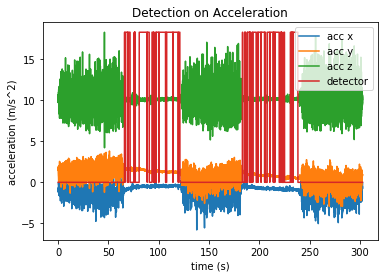

In [411]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

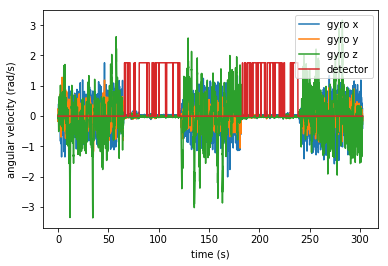

In [412]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

In [413]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)


In [414]:
res = np.zeros((len(windows)/2,3))

In [415]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])
    

('window1', [2411, 3882])
('window1', [3895, 4649])
('window1', [5835, 5981])
('window1', [6053, 6726])
('window1', [10746, 11261])
('window1', [11270, 12778])
('window1', [14071, 14094])
('window1', [14135, 16846])
('window1', [18710, 20901])
('window1', [26818, 26837])
('window1', [26968, 27973])
('window1', [28041, 28103])
('window1', [28378, 29044])
('window1', [30743, 30807])
('window1', [30818, 30845])
('window1', [30929, 30949])
('window1', [30987, 31116])
('window1', [32706, 35928])
('window1', [35975, 36763])
('window1', [36768, 36794])
('window1', [37877, 38515])
('window1', [38521, 38547])
('window1', [38552, 38722])
('window1', [39438, 39541])
('window1', [39583, 40598])
('window1', [40696, 43353])
('window1', [43499, 43635])
('window1', [43803, 46357])
('window1', [46381, 48451])
('window1', [48559, 49147])
('window1', [74458, 74495])
('window1', [75331, 75459])
('window1', [75464, 75577])
('window1', [76375, 76403])
('window1', [76521, 77390])
('window1', [77418, 77439])


In [417]:
import scipy.io as sio
sio.savemat('res2.mat', {'res2':res})

# 3. Climbing with Cellphone at Hand

In [489]:
std = pd.read_csv('data/new/6.csv', index_col = None, header = None)

In [490]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [491]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,-0.174683,3.014954,11.801407,0.000000,0.000000,0.000000
1,0.002411,ACC_UN,-0.174683,3.014954,11.801407,0.000000,0.000000,0.000000
2,0.004852,ACC_UN,-0.174683,3.014954,11.801407,0.000000,0.000000,0.000000
3,0.000000,GYRO_UN,0.128265,-0.015274,-0.030548,0.009628,-0.010483,-0.011078
4,0.002411,GYRO_UN,0.128265,-0.015274,-0.030548,0.009628,-0.010483,-0.011078
5,0.004852,GYRO_UN,0.128265,-0.015274,-0.030548,0.009628,-0.010483,-0.011078
6,0.007294,ACC_UN,-0.174683,3.014954,11.801407,0.000000,0.000000,0.000000
7,0.007294,GYRO_UN,0.128265,-0.015274,-0.030548,0.009628,-0.010483,-0.011078
8,0.009735,ACC_UN,-0.885345,2.857025,13.404587,0.000000,0.000000,0.000000
9,0.009735,GYRO_UN,0.369568,0.205246,0.224182,0.009628,-0.010483,-0.011078


In [492]:
time = std[0].values

In [493]:
## Acceleration

In [494]:
std_acc = std[std[1]==' ACC_UN']

In [495]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values


In [496]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

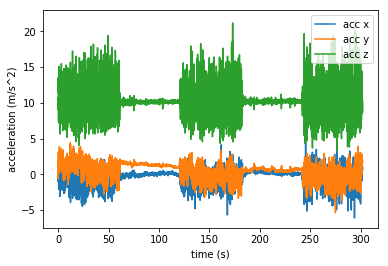

In [497]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


In [498]:
## Gyroscope

In [499]:
std_gyro = std[std[1]==' GYRO_UN']

In [500]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values


In [501]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

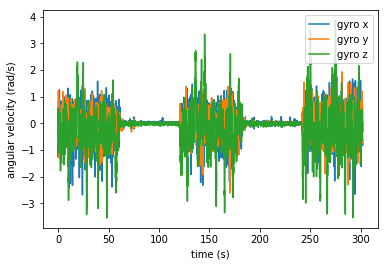

In [502]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [503]:
## Stability Detection

In [504]:
g = np.mean(acc_z)
g

10.176097052011478

In [505]:
sig_acc = g
sig_gyro = 0 + 0.3

In [506]:
w_min = 0.3
w_max = 1.1


In [507]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [508]:
std_static  = np.zeros(len(acc_t))

In [509]:
i = 0

while(acc_t[i] + w_max < acc_t[-1]):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            if acc_t[i] > indexR:
                std_static[i] = 1
    
    ##############

    i = i + 1


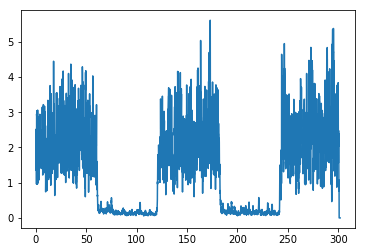

In [510]:
plt.plot(acc_t,std_acc)


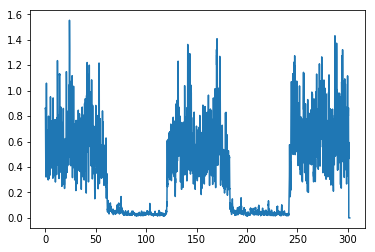

In [511]:
plt.plot(acc_t,std_gyro)

Text(0.5,1,u'Detection on Acceleration')

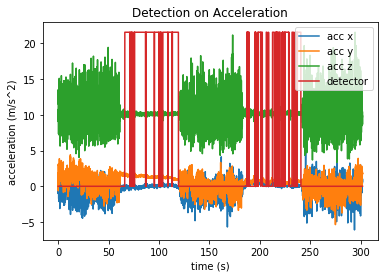

In [512]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

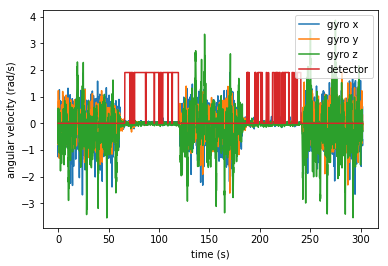

In [513]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [517]:
windows = []

In [518]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)


In [519]:
res = np.zeros((len(windows)/2,3))

In [520]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])
    



('window1', [26822, 28837])
('window1', [28947, 29261])
('window1', [29441, 29588])
('window1', [29657, 30089])
('window1', [30603, 30721])
('window1', [30744, 35192])
('window1', [35305, 35432])
('window1', [35446, 38704])
('window1', [38801, 40545])
('window1', [41270, 41660])
('window1', [42155, 44158])
('window1', [44218, 45816])
('window1', [45897, 45944])
('window1', [46002, 48448])
('window1', [76055, 76071])
('window1', [76130, 76191])
('window1', [76200, 76238])
('window1', [76312, 76672])
('window1', [76739, 76957])
('window1', [79268, 79303])
('window1', [79324, 79477])
('window1', [79529, 79654])
('window1', [80442, 80561])
('window1', [80622, 81608])
('window1', [81670, 82267])
('window1', [83861, 84166])
('window1', [86358, 87090])
('window1', [87698, 87851])
('window1', [88020, 88055])
('window1', [88088, 88218])
('window1', [88299, 88452])
('window1', [88873, 88974])
('window1', [89091, 89433])
('window1', [90313, 90341])
('window1', [90391, 90416])
('window1', [90478, 

In [522]:
import scipy.io as sio
sio.savemat('res3.mat', {'res3':res})

# Previous

# 1. Walking

In [2]:
!pwd

/Users/Joanna/Documents/PhD/Research/Polaris/NLE/Git/3d-tracking-at-gt-main/Station_Detection


In [2]:
std = pd.read_csv('sensors_1599604379030.csv', index_col = None, header = None)

In [3]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [4]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,-0.198608,0.040680,10.700699,0.000000,0.000000,0.000000
1,0.002411,ACC_UN,-0.198608,0.040680,10.700699,0.000000,0.000000,0.000000
2,0.004822,ACC_UN,-0.198608,0.040680,10.700699,0.000000,0.000000,0.000000
3,0.000000,GYRO_UN,-0.015274,0.538162,-0.149048,0.008698,-0.008224,-0.019043
4,0.002411,GYRO_UN,-0.015274,0.538162,-0.149048,0.008698,-0.008224,-0.019043
5,0.004822,GYRO_UN,-0.015274,0.538162,-0.149048,0.008698,-0.008224,-0.019043
6,0.007263,ACC_UN,-0.198608,0.040680,10.700699,0.000000,0.000000,0.000000
7,0.007263,GYRO_UN,-0.015274,0.538162,-0.149048,0.008698,-0.008224,-0.019043
8,0.009705,ACC_UN,-0.289536,-0.334991,11.413757,0.000000,0.000000,0.000000
9,0.009705,GYRO_UN,0.227234,0.307251,0.204025,0.008698,-0.008224,-0.019043


In [5]:
time = std[0].values

## Acceleration

In [6]:
std_acc = std[std[1]==' ACC_UN']

In [7]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [8]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

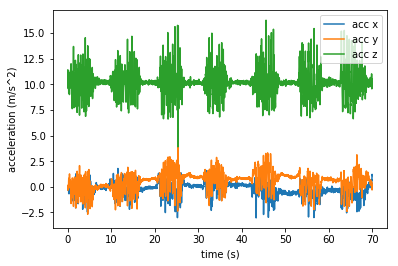

In [9]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

## Gyroscope

In [10]:
std_gyro = std[std[1]==' GYRO_UN']

In [11]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [12]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

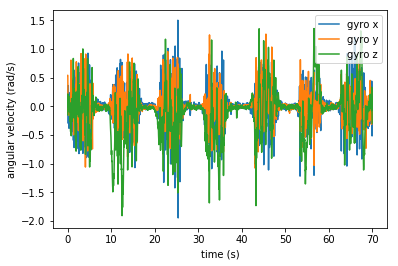

In [13]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [14]:
g = np.mean(acc_z)
g

10.186590902357514

In [15]:
sig_acc = g
sig_gyro = 0 + 0.5

In [16]:
w_min = 0.3
w_max = 1.1

In [25]:
std_acc  = np.zeros(len(std[0]))
std_gyro = np.zeros(len(std[0]))

In [26]:
std_static  = np.zeros(len(std[0]))

In [27]:
i = 0

while(time[i] + w_max < 70):

    std_part = std[std[0] < (time[i] + w_min)]
    std_part = std_part[std_part[0] > time[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (time[i] + w_max)]
        std_part = std_part[std_part[0] > time[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

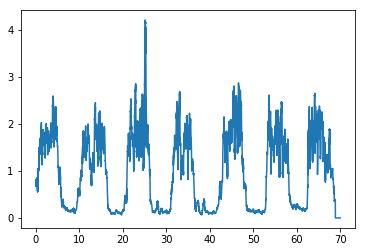

In [28]:
plt.plot(time,std_acc)

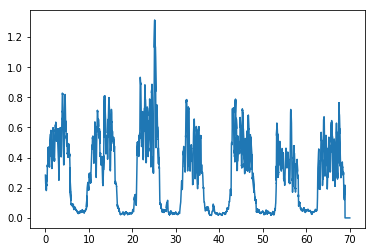

In [29]:
plt.plot(time,std_gyro)

Text(0.5,1,u'Detection on Acceleration')

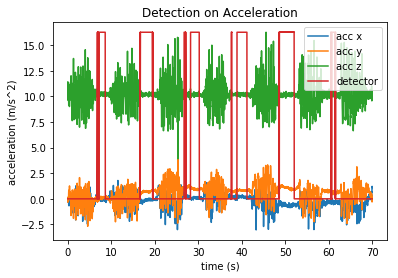

In [30]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(time,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

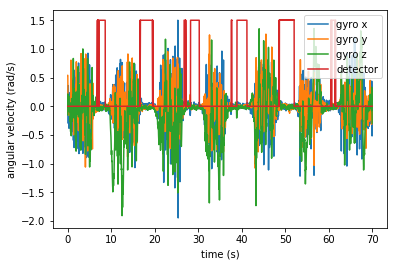

In [32]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(time,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

# 2. Apparatus

In [82]:
std = pd.read_csv('appar/sensors_xt.csv', index_col = None, header = None)[0:300000]

In [83]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [84]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,0.032200,4.233892,8.853810,0.000000,0.000000,0.000000
1,0.002418,ACC_UN,0.044171,4.255438,8.844234,0.000000,0.000000,0.000000
2,0.004836,ACC_UN,0.039382,4.255438,8.858599,0.000000,0.000000,0.000000
3,0.007254,ACC_UN,0.032200,4.265015,8.880145,0.000000,0.000000,0.000000
4,0.009671,ACC_UN,0.034594,4.291350,8.882540,0.000000,0.000000,0.000000
5,0.012089,ACC_UN,0.008259,4.322474,8.875358,0.000000,0.000000,0.000000
6,0.008462,GYRO_UN,-0.031695,-0.024850,-0.059901,0.002453,-0.000828,-0.030511
7,0.010880,GYRO_UN,-0.031695,-0.024850,-0.059901,0.002453,-0.000828,-0.030511
8,0.013299,GYRO_UN,-0.031695,-0.024850,-0.059901,0.002453,-0.000828,-0.030511
9,0.015716,GYRO_UN,-0.031695,-0.024850,-0.059901,0.002453,-0.000828,-0.030511


In [85]:
time = std[0].values

## Acceleration

In [86]:
std_acc = std[std[1]==' ACC_UN']

In [87]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [88]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

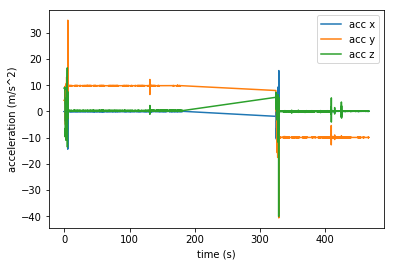

In [89]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

## Gyroscope

In [90]:
std_gyro = std[std[1]==' GYRO_UN']

In [91]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [92]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

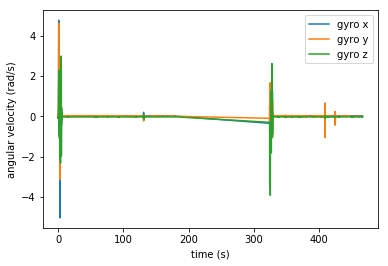

In [93]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [94]:
g = np.mean(acc_z)
g

0.16935015764203515

In [95]:
sig_acc = g
sig_gyro = 0 + 0.5

In [96]:
w_min = 0.3
w_max = 1.1

In [97]:
std_acc  = np.zeros(len(std[0]))
std_gyro = np.zeros(len(std[0]))

In [98]:
std_static  = np.zeros(len(std[0]))

In [99]:
i = 0

while(time[i] + w_max < round(time[-1] - 1)):

    std_part = std[std[0] < (time[i] + w_min)]
    std_part = std_part[std_part[0] > time[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (time[i] + w_max)]
        std_part = std_part[std_part[0] > time[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

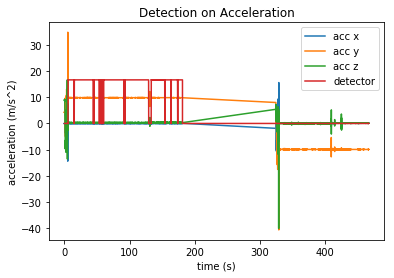

In [102]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(time,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

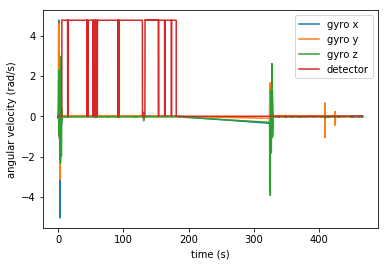

In [103]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(time,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

# 2.2 Apparatus

In [21]:
std = pd.read_csv('appar/sensors_gyro_x.csv', index_col = None, header = None)[0:100000]

In [22]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [23]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,-0.092293,9.838477,0.239842,0.000000,0.000000,0.000000
1,0.002421,ACC_UN,-0.087505,9.828901,0.232660,0.000000,0.000000,0.000000
2,0.004908,ACC_UN,-0.075534,9.831295,0.225478,0.000000,0.000000,0.000000
3,0.007326,ACC_UN,-0.053987,9.867206,0.247025,0.000000,0.000000,0.000000
4,0.009664,ACC_UN,-0.053987,9.845659,0.211113,0.000000,0.000000,0.000000
5,0.010862,GYRO_UN,0.002514,0.002028,-0.022028,0.003043,0.000246,-0.028263
6,0.013293,GYRO_UN,0.002514,0.002028,-0.022028,0.003043,0.000246,-0.028263
7,0.012077,ACC_UN,-0.037229,9.819324,0.223084,0.000000,0.000000,0.000000
8,0.014506,ACC_UN,-0.015682,9.802565,0.206325,0.000000,0.000000,0.000000
9,0.015720,GYRO_UN,0.002514,0.002028,-0.022028,0.003043,0.000246,-0.028263


In [24]:
time = std[0].values

## Acceleration

In [25]:
std_acc = std[std[1]==' ACC_UN']

In [26]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [27]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

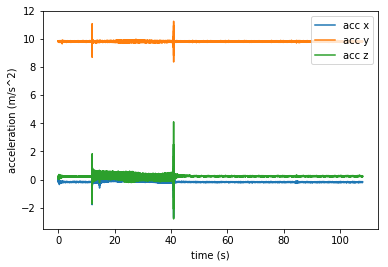

In [28]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

## Gyroscope

In [29]:
std_gyro = std[std[1]==' GYRO_UN']

In [30]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [31]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

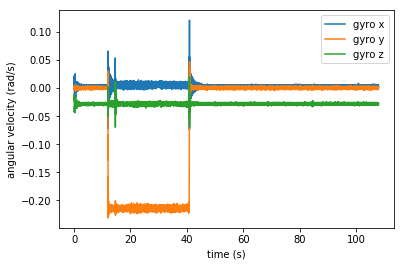

In [32]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [33]:
g = np.mean(acc_z)
g

0.22631025423736298

In [34]:
sig_acc = g
sig_gyro = 0 + 0.5

In [35]:
w_min = 0.3
w_max = 1.1

In [36]:
std_acc  = np.zeros(len(std[0]))
std_gyro = np.zeros(len(std[0]))

In [37]:
std_static  = np.zeros(len(std[0]))

In [38]:
i = 0

while(time[i] + w_max < round(time[-1] - 1)):

    std_part = std[std[0] < (time[i] + w_min)]
    std_part = std_part[std_part[0] > time[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (time[i] + w_max)]
        std_part = std_part[std_part[0] > time[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

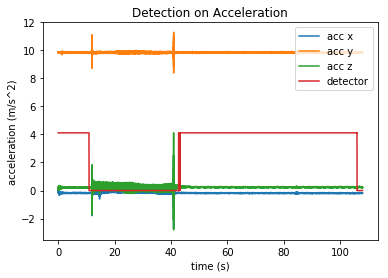

In [39]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(time,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

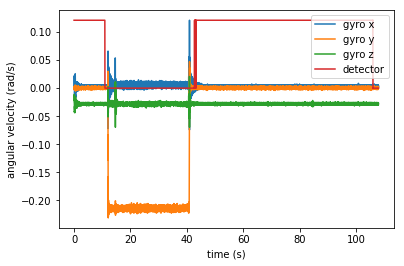

In [40]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(time,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

# 3 Driving

In [41]:
std = pd.read_csv('data/3.csv', index_col = None, header = None)[0:100000]

In [42]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [43]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,0.598206,8.965912,4.235291,0.000000,0.00000,0.000000
1,0.002411,ACC_UN,0.598206,8.965912,4.235291,0.000000,0.00000,0.000000
2,0.004852,ACC_UN,0.598206,8.965912,4.235291,0.000000,0.00000,0.000000
3,0.000000,GYRO_UN,-0.005493,-0.007935,-0.015274,0.008545,-0.01207,-0.014145
4,0.002411,GYRO_UN,-0.005493,-0.007935,-0.015274,0.008545,-0.01207,-0.014145
5,0.004852,GYRO_UN,-0.005493,-0.007935,-0.015274,0.008545,-0.01207,-0.014145
6,0.007294,ACC_UN,0.847061,8.791229,4.223328,0.000000,0.00000,0.000000
7,0.007294,GYRO_UN,-0.094070,0.009155,0.048859,0.008545,-0.01207,-0.014145
8,0.009735,ACC_UN,0.978668,8.824738,4.759323,0.000000,0.00000,0.000000
9,0.009735,GYRO_UN,-0.089798,0.009155,0.032364,0.008545,-0.01207,-0.014145


In [44]:
time = std[0].values

## Acceleration

In [45]:
std_acc = std[std[1]==' ACC_UN']

In [46]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [47]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

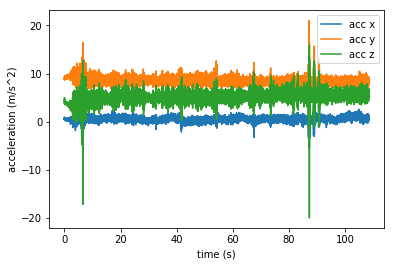

In [48]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

## Gyroscope

In [49]:
std_gyro = std[std[1]==' GYRO_UN']

In [50]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [51]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

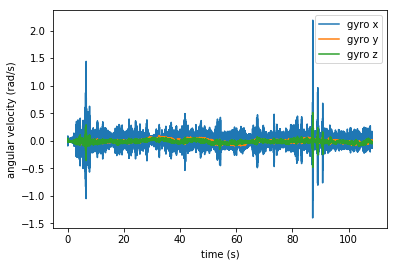

In [52]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [53]:
g = np.mean(acc_z)
g

5.174612139882357

In [54]:
sig_acc = g
sig_gyro = 0 + 0.5

In [55]:
w_min = 0.3
w_max = 1.1

In [56]:
std_acc  = np.zeros(len(std[0]))
std_gyro = np.zeros(len(std[0]))

In [57]:
std_static  = np.zeros(len(std[0]))

In [58]:
i = 0

while(time[i] + w_max < round(time[-1] - 1)):

    std_part = std[std[0] < (time[i] + w_min)]
    std_part = std_part[std_part[0] > time[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (time[i] + w_max)]
        std_part = std_part[std_part[0] > time[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

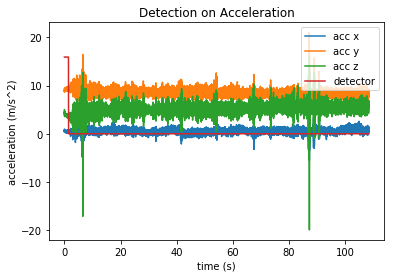

In [59]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(time,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

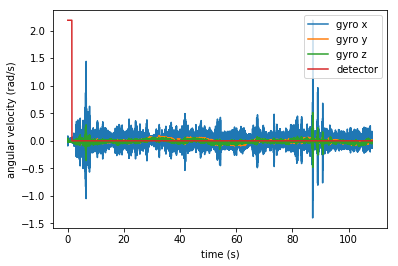

In [60]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(time,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

# 4 Static

In [61]:
std = pd.read_csv('data/5.csv', index_col = None, header = None)[0:100000]

In [62]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [63]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,MAG_UN,107.000732,-12.896729,-33.436584,94.725037,-19.978333,8.154297
1,0.001221,ACC_UN,-0.366104,0.062210,10.169495,0.000000,0.000000,0.000000
2,0.003632,ACC_UN,-0.366104,0.062210,10.169495,0.000000,0.000000,0.000000
3,0.006073,ACC_UN,-0.366104,0.062210,10.169495,0.000000,0.000000,0.000000
4,0.001221,GYRO_UN,-0.721451,-0.210144,-0.031158,0.008545,-0.012070,-0.014145
5,0.003632,GYRO_UN,-0.721451,-0.210144,-0.031158,0.008545,-0.012070,-0.014145
6,0.006073,GYRO_UN,-0.721451,-0.210144,-0.031158,0.008545,-0.012070,-0.014145
7,0.008514,ACC_UN,-0.366104,0.062210,10.169495,0.000000,0.000000,0.000000
8,0.008514,GYRO_UN,-0.721451,-0.210144,-0.031158,0.008545,-0.012070,-0.014145
9,0.010956,ACC_UN,-0.344574,0.064606,10.162323,0.000000,0.000000,0.000000


In [64]:
time = std[0].values

## Acceleration

In [65]:
std_acc = std[std[1]==' ACC_UN']

In [66]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [67]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

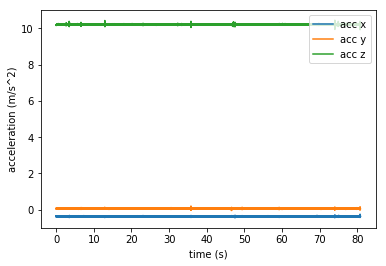

In [68]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

## Gyroscope

In [69]:
std_gyro = std[std[1]==' GYRO_UN']

In [70]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [71]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

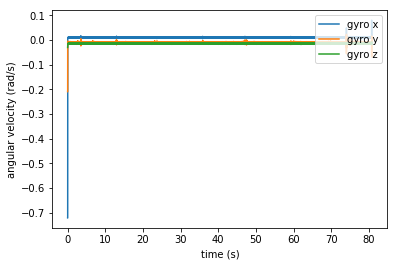

In [72]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [73]:
g = np.mean(acc_z)
g

10.209290637125335

In [74]:
sig_acc = g
sig_gyro = 0 + 0.5

In [75]:
w_min = 0.3
w_max = 1.1

In [76]:
std_acc  = np.zeros(len(std[0]))
std_gyro = np.zeros(len(std[0]))

In [77]:
std_static  = np.zeros(len(std[0]))

In [78]:
i = 0

while(time[i] + w_max < round(time[-1] - 1)):

    std_part = std[std[0] < (time[i] + w_min)]
    std_part = std_part[std_part[0] > time[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (time[i] + w_max)]
        std_part = std_part[std_part[0] > time[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

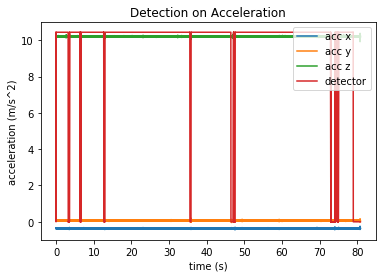

In [79]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(time,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

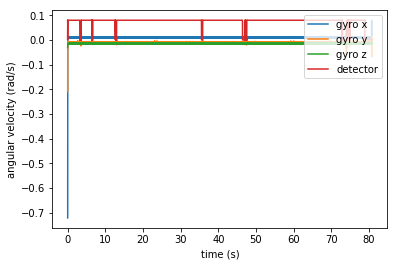

In [80]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(time,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')